# Solving the n-Queens Problem using Local Search

Student Name: [Nguyen Thanh Long]

I have used the following AI tools: [ChatGPT]

I understand that my submission needs to be my own work: [I do understand]


## Learning Outcomes

* Implement multiple hill climbing search variants to solve the n-Queens problem.
* Apply simulated annealing with appropriate temperature scheduling to overcome local optima.
* Compare algorithm performance using runtime, solution quality, and success rate metrics.
* Analyze and visualize algorithm performance across different problem sizes.
* Graduate Students: Design and test alternative local move operators to improve search efficiency.

### Kết quả học tập
- Triển khai nhiều biến thể khác nhau của thuật toán leo đồi (Hill Climbing) để giải quyết bài toán n-Queens.
- Áp dụng phương pháp mô phỏng tôi luyện (Simulated Annealing) cùng với lịch trình nhiệt độ (temperature schedule) phù hợp nhằm vượt qua các cực trị cục bộ (local optima).
- So sánh hiệu suất của các thuật toán dựa trên các chỉ số: thời gian chạy (runtime), chất lượng nghiệm (solution quality), và tỉ lệ thành công (success rate).
- Phân tích và trực quan hóa hiệu suất của thuật toán trên các kích thước bàn cờ khác nhau.
- Đối với học viên cao học: Thiết kế và thử nghiệm các phép di chuyển cục bộ thay thế (alternative local move operators) nhằm nâng cao hiệu quả tìm kiếm.


## Instructions

Total Points: Undergrads 100 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

### Hướng dẫn
- Tổng điểm: Sinh viên đại học: 100 điểm(+5 điểm thưởng) / Học viên cao học: 110 điểm.
- Hoàn thiện toàn bộ nội dung trong notebook. Sử dụng các ô (cells) được cung cấp sẵn và bổ sung thêm các ô mã (code cells) hoặc ghi chú (markdown cells) khi cần thiết.
- Sau khi hoàn tất, xuất (render) toàn bộ notebook và nộp dưới định dạng tệp HTML.

## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum.

### **Vấn đề N-Queens**

* **Mục tiêu:** Tìm một cách sắp xếp *n* quân hậu trên bàn cờ *n × n* sao cho không có hai quân hậu nào cùng nằm trên cùng một hàng, cột hoặc đường chéo.

* **Không gian trạng thái (State space):**
  Một trạng thái là một cách sắp xếp các quân hậu trên bàn cờ.
  Chúng ta giới hạn không gian trạng thái ở những sắp xếp chỉ có **một quân hậu trên mỗi cột**.
  Mỗi trạng thái được biểu diễn bằng một **vector số nguyên**
  $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, trong đó mỗi phần tử $q_i$ biểu thị **vị trí hàng** của quân hậu trong cột thứ $i$ (từ trái sang phải).
  Ta sẽ gọi mỗi trạng thái là một “bàn cờ”.

* **Hàm mục tiêu (Objective function):**
  Là **số cặp xung đột** giữa các quân hậu (ví dụ: hai quân hậu nằm trên cùng hàng, cột hoặc đường chéo).
  Bài toán tối ưu là tìm một sắp xếp tối ưu $\mathbf{q}^*$ của $n$ quân hậu sao cho:
  $
  \text{minimize: } conflicts(\mathbf{q})
  $
  với điều kiện rằng:
  $
  \mathbf{q} \text{ chỉ chứa một quân hậu trên mỗi cột.}
  $

  Lưu ý: điều kiện ràng buộc này đã được đảm bảo bởi cách định nghĩa của không gian trạng thái.

* **Phép di chuyển cải thiện cục bộ (Local improvement move):**
  Di chuyển một quân hậu sang **một hàng khác trong cùng cột**.

* **Điều kiện dừng (Termination):**
  Đối với bài toán này, luôn tồn tại một sắp xếp $\mathbf{q}^
  *$ sao cho $conflicts(\mathbf{q}^*) = 0$.
  Tuy nhiên, trong quá trình tối ưu, các bước cải thiện cục bộ có thể khiến ta **rơi vào cực tiểu cục bộ** (local minimum).


## Helper functions

Helper functions have 4 definations:
* random_board(n)
* comb2(n)
* conflicts(board)
* showboard(board,cols,fontsize)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    #Tạo bàn cờ ngẫu nhiên kích thước n x n. Mỗi cột chỉ có duy nhất một quân hậu!

    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division
                                #The mathematical expression C(n,2) represents the number of ways to choose 2 items from a set of ( n ) items, also known as a combination.

def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""
    #Tính số lượng xung đột — hay nói cách khác, hàm mục tiêu (objective function) của bài toán.

    n = len(board)

    horizontal_cnt = [0] * n #Tạo ra mảng chứa n số 0 tượng trưng cho số hàng ngang của bàn cờ
    diagonal1_cnt = [0] * (2 * n - 1) # Tạo ra mảng chứa 2n số 0 tượng trưng cho số đường chéo phụ của bàn cờ
    diagonal2_cnt = [0] * (2 * n - 1) # Tạo ra mảng chứa 2n số 0 tượng trưng cho số đường chéo chính của bàn cờ

    for i in range(n):
        horizontal_cnt[board[i]] += 1 #boardi trả về hàng hậu đứng, lúc này vị trí hori_cnt[x] tăng từ 0 lên 1 vì có 1 hậu
        diagonal1_cnt[i + board[i]] += 1 #i đầu là cột, board[i] là hàng, đường chéo phụ /
        diagonal2_cnt[i - board[i] + (n-1)] += 1 #i đầu là cột, board[i] là hàng, +(n-1) để số không âm, đường chéo chính \

    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))
#sum() tính tổng
#map(function,y)->áp dụng function cho y, y là list[0,1,2,3] thì function sẽ lần lượt áp dụng lên y: function(0), function(1)...
#các các chuỗi cnt + nhau = 1 chuoi thong nhat

# decrease the font size to fit larger boards
def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

In [2]:
def conflicts(board):
    """Calculate the number of conflicts, i.e., the objective function."""
    #Tính số lượng xung đột — hay nói cách khác, hàm mục tiêu (objective function) của bài toán.

    n = len(board)

    horizontal_cnt = [0] * n #Tạo ra mảng chứa n số 0 tượng trưng cho số hàng ngang của bàn cờ
    diagonal1_cnt = [0] * (2 * n - 1) # Tạo ra mảng chứa 2n số 0 tượng trưng cho số đường chéo phụ của bàn cờ
    diagonal2_cnt = [0] * (2 * n - 1) # Tạo ra mảng chứa 2n số 0 tượng trưng cho số đường chéo chính của bàn cờ

    for i in range(n):
        horizontal_cnt[board[i]] += 1 #boardi trả về hàng hậu đứng, lúc này vị trí hori_cnt[x] tăng từ 0 lên 1 vì có 1 hậu
        diagonal1_cnt[i + board[i]] += 1 #i đầu là cột, board[i] là hàng, đường chéo phụ /
        diagonal2_cnt[i - board[i] + (n-1)] += 1 #i đầu là cột, board[i] là hàng, +(n-1) để số không âm, đường chéo chính \

    # print(f"horizontal queen: {horizontal_cnt}")
    # print(f"diagonal queen /: {diagonal1_cnt}")
    # print(f"diagonal queen \: {diagonal2_cnt}")
    # print(f"Big list: {horizontal_cnt + diagonal1_cnt + diagonal2_cnt}")
    # print(f"Map comb2 to big list: {list(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))}")
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))



## Create a board

Board with 4 conflicts.


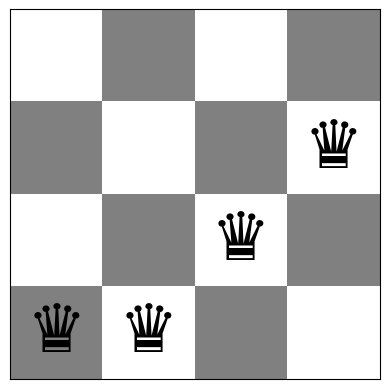

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [7]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


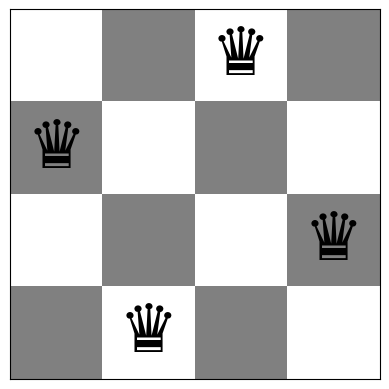

In [3]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.

## Các Nhiệm vụ
Chung [10 Điểm]
1. Đảm bảo rằng bạn sử dụng phiên bản mới nhất của sổ tay (notebook) này. Đồng bộ hóa kho lưu trữ đã fork của bạn và kéo (pull) bản sửa đổi mới nhất.

2. Việc triển khai của bạn có thể sử dụng các thư viện như math, numpy, scipy, nhưng không được sử dụng các thư viện triển khai các tác nhân thông minh (intelligent agents) hoặc các thuật toán tìm kiếm hoàn chỉnh. Cố gắng giữ cho mã nguồn đơn giản! Trong khóa học này, chúng ta muốn tìm hiểu về các thuật toán và thường không cần sử dụng thiết kế hướng đối tượng (object-oriented design).

3. Sổ tay của bạn cần được định dạng chuyên nghiệp.

 * Thêm các khối markdown bổ sung cho mô tả của bạn, nhận xét trong mã, thêm bảng và sử dụng matplotlib để tạo biểu đồ khi thích hợp.

 * Không hiển thị đầu ra gỡ lỗi (debugging output) hoặc bao gồm một lượng đầu ra quá mức.

 * Kiểm tra xem tệp bạn gửi có dễ đọc và chứa tất cả các hình ảnh/biểu đồ (figures) hay không.

4. Tài liệu hóa mã của bạn. Sử dụng nhận xét trong mã và thêm một bài thảo luận về cách thức triển khai của bạn hoạt động và các lựa chọn thiết kế của bạn.

## Task 1: Steepest-ascend Hill Climbing Search [20 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum.

Task 1: Tìm kiếm leo đồi siêu dốc

Tính toán hàm mục tiêu cho toàn bộ nước đi cục bộ(xem định nghĩa về các nước đi cục bộ ở trên) và luôn chọn nước đi tốt nhất. Nếu không có bước di chuyển cục bộ nào cải thiện được giá trị mục tiêu, thì bạn đã đạt đến tối ưu cục bộ (local optimum).

In [7]:
board = random_board(4)
board
conflicts(board)

4

In [8]:
def steepest_ascent_hill_climbing(initial_board):
    """
    Thực hiện thuật toán Steepest-Ascent Hill Climbing để giải quyết bài toán n-Queens.

    Args:
        initial_board: Trạng thái bàn cờ ban đầu.

    Returns:
        Trạng thái bàn cờ cuối cùng sau khi tối ưu.
    """
    board = initial_board.copy()

    while True:
        current_conflicts = conflicts(board)
        best_conflicts = current_conflicts
        best_board = board

        n = len(board)
        # Duyệt qua tất cả các nước đi có thể
        for col in range(n):
            for row in range(n):
                # Không cần thử di chuyển đến vị trí cũ
                if board[col] == row:
                    continue

                # Tạo một bản sao để thử nghiệm nước đi
                temp_board = board.copy()
                temp_board[col] = row
                temp_conflicts = conflicts(temp_board)

                # Nếu tìm thấy một nước đi tốt hơn, ghi nhớ nó lại
                if temp_conflicts < best_conflicts:
                    best_conflicts = temp_conflicts
                    best_board = temp_board

        # Sau khi đã thử tất cả các nước đi:
        # Nếu không có nước đi nào tốt hơn, chúng ta đã đạt tối ưu cục bộ -> dừng lại
        if best_conflicts == current_conflicts:
            print("Đã đạt tối ưu cục bộ. Dừng lại.")
            return best_board

        # Nếu có, cập nhật bàn cờ và tiếp tục vòng lặp
        print(f"Tìm thấy nước đi tốt hơn, số xung đột giảm từ {current_conflicts} xuống {best_conflicts}.")
        board = best_board

Bàn cờ ban đầu:
Board with 8 conflicts.


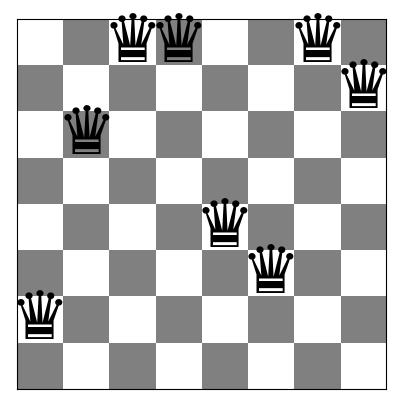

Tìm thấy nước đi tốt hơn, số xung đột giảm từ 8 xuống 5.
Tìm thấy nước đi tốt hơn, số xung đột giảm từ 5 xuống 3.
Tìm thấy nước đi tốt hơn, số xung đột giảm từ 3 xuống 2.
Tìm thấy nước đi tốt hơn, số xung đột giảm từ 2 xuống 1.
Đã đạt tối ưu cục bộ. Dừng lại.

Bàn cờ cuối cùng:
Board with 1 conflicts.


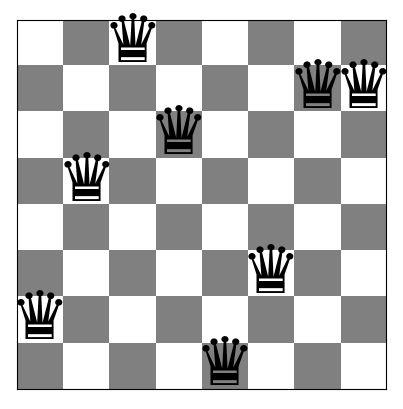

In [9]:
# 1. Tạo một bàn cờ ngẫu nhiên
start_board = random_board(8) # Ví dụ với bàn cờ 8x8
print("Bàn cờ ban đầu:")
show_board(start_board)

# 2. Chạy thuật toán
final_board = steepest_ascent_hill_climbing(start_board)

# 3. Hiển thị kết quả
print("\nBàn cờ cuối cùng:")
show_board(final_board)

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [5]:
# Code and description go here

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [6]:
# Code and description go here

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algorithm several times starting with a new random board.

In [7]:
# Code and description go here

## Task 5: Simulated Annealing [10 Points]

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Create a visualization of the search process (a line chart of how the number if conflict changes as the algorithm progrsses).
3. Use this visualization for experiments with different choices for the annealing schedule and discuss what you have learned.

In [ ]:
# Code and description go here

## Task 6: Algorithm Behavior Analysis [20 Points]

### Comparison
Compare the algorithm using runtime and objective function values. Use boards of size 4 and 8 to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 100 times) with different starting boards and report averages.

Complete the following table

| Algorithm           | Board size | Avg. Run time | Avg. number of conflicts | % of runs ending in optimal solution  |
| ------------------- | ---------- | ------------- | --------------------------------- | - |
| Steepest asc. HC    |     4      |               |                                   |   |
| Stochastic HC 1     |     4      |               |                                   |   |
| Stochastic HC 2     |     4      |               |                                   |   |
| Simulated Annealing |     4      |               |                                   |   |
| Steepest asc. HC    |     8      |               |                                   |   |
| Stochastic HC 1     |     8      |               |                                   |   |
| Stochastic HC 2     |     8      |               |                                   |   |
| Simulated Annealing |     8      |               |                                   |   |

Hint: See [Profiling Python Code](../HOWTOs/profiling_code.ipynb) for help about how to measure runtime in Python.

Add the used code here:

In [ ]:
# Code

### Algorithm Convergence

For each algorithm implemented, describe the typical convergence pattern (fast initial improvement vs. steady progress).
Include a plot showing the objective function value over iterations for one representative run of each algorithm on the 8-queens problem.
Explain which algorithms exhibit plateaus or getting stuck in local optima most frequently.

In [ ]:
# Code and description go here

### Problem Size Scalability

Create a log-log plot showing how runtime scales with board size ($n=4, 8, 12, 16, 20$) for at least two algorithms.
Estimate the empirical time complexity (Big O) for each algorithm based on your results.
Identify which algorithm scales best for large problem sizes and explain why.

In [ ]:
# Code and description go here

## Advanced task: Exploring other Local Moves Operators

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

### Move Operator Implementation 

Implement the following local move operators:

* Single-step move: Move one queen only one square up or down at a time
* Column swap: Exchange the positions of queens in two randomly selected columns
* Dual-queen move: Select two queens and move both simultaneously
* Adaptive move: Design your own operator that adapts which local move it uses based on the current state (e.g., focuses on queens with most conflicts or randomly chooses one of the moves above)

### Experimental Analysis

Using the 8-Queens and 12-Queens problems: Run your Stochastic Hill Climbing 2 implementation with each move operator 100 times
For each operator, create a visualization showing:

* Average solution quality over iterations
* Distribution of final solution qualities
* Average time to solution for successful runs

### Discussion

Describe what you have learned from the experiments. Which operator works best for which situation and why?

In [9]:
# Code and description go here

## More Things to Do (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment. 

### Implement a Genetic Algorithm for the n-Queens problem

In [10]:
# Code and description go here